<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_8_Bag_of_Visual_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Image

In [0]:
from skimage import data

In [5]:
img = data.camera()

img.shape, type(img), img

((512, 512), numpy.ndarray, array([[156, 157, 160, ..., 152, 152, 152],
        [156, 157, 159, ..., 152, 152, 152],
        [158, 157, 156, ..., 152, 152, 152],
        ...,
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111]], dtype=uint8))

## Show Image

In [0]:
import matplotlib.pyplot as plt

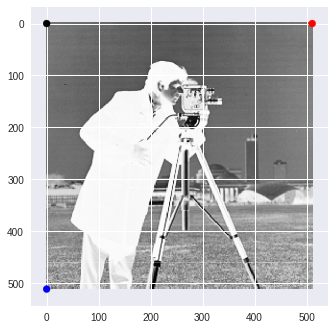

In [7]:
# plt.plot(img)
plt.imshow(img, interpolation='nearest')
plt.scatter(x=[0, 511, 0], y=[0, 0, 511], c=('black', 'r', 'b'))    # origin -> black, x-axis -> red, y-axis -> blue
plt.show()

In [0]:
from PIL import Image

In [9]:
image = Image.fromarray(img, 'L')
print(image, type(image), image.size)
image.save('image.jpeg')

<PIL.Image.Image image mode=L size=512x512 at 0x7F323BBC7A90> <class 'PIL.Image.Image'> (512, 512)


#### Testing

In [33]:
import numpy as np
from PIL import Image

a = [[0, 15, 31]*10, [63, 127, 255]*10]*10
a = np.array(a)
im = Image.fromarray(a, 'L')
print(a.shape, im.size)    # ~> Shape of NumPy-array (and not that of Image object) gives the real image's shape (i.e. in format of height*width)

(20, 30) (30, 20)


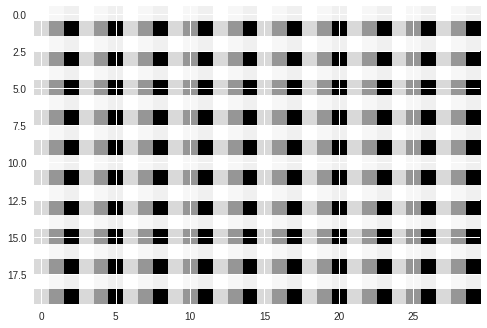

In [34]:
plt.imshow(a)
plt.show()

im.save('test.jpg')

## Slicing Image into Chunks

In [0]:
# N_CHUNKS_PER_AXIS = 32
DIM_PATCH = (128, 128)

In [60]:
n_chunk_x = int(image.size[1] / DIM_PATCH[0])
n_chunk_y = image.size[0] // DIM_PATCH[1]
print(n_chunk_x, n_chunk_y, type(n_chunk_x))

for x_coord in range(n_chunk_x):
    for y_coord in range(n_chunk_y):
        patch_loc = (x_coord*DIM_PATCH[0], y_coord*DIM_PATCH[1], (x_coord+1)*DIM_PATCH[0], (y_coord+1)*DIM_PATCH[1])    # (left, top, right, down)
        print(patch_loc)
        
        patch = image.crop(box=patch_loc)
        print(patch.size)
        patch.save('image_patch_' + str(x_coord) + '_' + str(y_coord) + '.jpg')    # (Row index, Column index)

4 4 <class 'int'>
(0, 0, 128, 128)
(128, 128)
(0, 128, 128, 256)
(128, 128)
(0, 256, 128, 384)
(128, 128)
(0, 384, 128, 512)
(128, 128)
(128, 0, 256, 128)
(128, 128)
(128, 128, 256, 256)
(128, 128)
(128, 256, 256, 384)
(128, 128)
(128, 384, 256, 512)
(128, 128)
(256, 0, 384, 128)
(128, 128)
(256, 128, 384, 256)
(128, 128)
(256, 256, 384, 384)
(128, 128)
(256, 384, 384, 512)
(128, 128)
(384, 0, 512, 128)
(128, 128)
(384, 128, 512, 256)
(128, 128)
(384, 256, 512, 384)
(128, 128)
(384, 384, 512, 512)
(128, 128)


## Slicing Numpy-Array into Chunks

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [42]:
# N_CHUNKS_PER_AXIS = 32
DIM_PATCH = (128, 128)

n_chunks_x = img.shape[0] // DIM_PATCH[0]
n_chunks_y = img.shape[1] // DIM_PATCH[1]
print(n_chunks_x, n_chunks_y)

4 4


(4, 128, 512)
(128, 512) <class 'numpy.ndarray'>


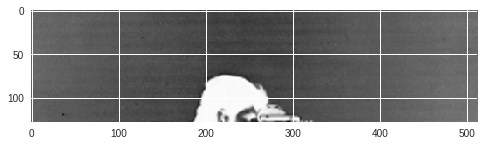

In [51]:
img_strips = np.array_split(img, n_chunks_x, axis=0)    # horizontal strips
# img_strips = np.array_split(img, n_chunks_x, axis=1)    # vertical strips

print(np.shape(img_strips))
print(img_strips[0].shape, type(img_strips[0]))
plt.imshow(img_strips[0])


(4, 4, 128, 128)


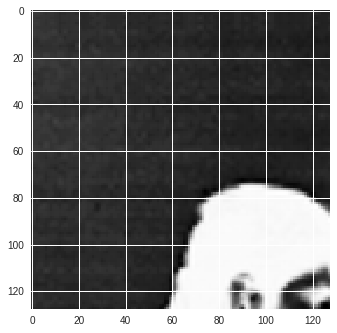

In [55]:
# img_patches = [np.array_split(strip, n_chunks_y, axis=0) for strip in img_strips]    # if strips are vertical
img_patches = [np.array_split(strip, n_chunks_y, axis=1) for strip in img_strips]    # if strips are horizontal

print(np.shape(img_patches))
plt.imshow(img_patches[0][1])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


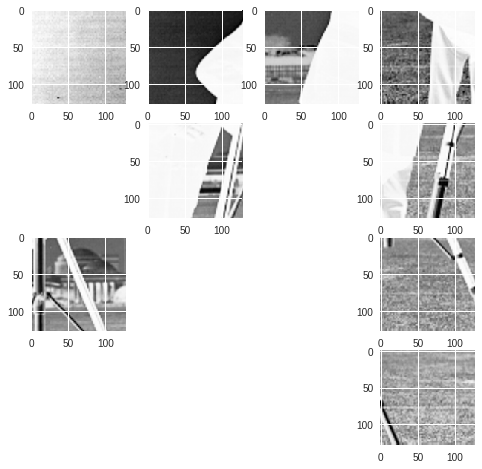

In [56]:
# TODO: Not properly oriented and some patches missing
fig = plt.figure(figsize=(DIM_PATCH[0]/16, DIM_PATCH[1]/16))

for i in range(n_chunks_x):
    for j in range(n_chunks_y):
        fig.add_subplot(n_chunks_x, n_chunks_y, (i+1)*(j+1))
        plt.imshow(img_patches[i][j])
plt.show()

### Saving array-chunks as Image

In [57]:
for i in range(n_chunks_x):
    for j in range(n_chunks_y):
        patch = Image.fromarray(img_patches[i][j], 'L')
        print(patch, type(patch), patch.size)
        patch.save('array_patch' + str(i) + '_' + str(j) + '.jpg')    # (Column index, Row index)

<PIL.Image.Image image mode=L size=128x128 at 0x7F3239731B00> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364358> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F32398E0978> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239731B00> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364358> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F32398E0978> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364358> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364320> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364358> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7F3239364320> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image

## Build Dataset of Images

In [0]:
! mkdir dataset
# ! mkdir dataset/1
! ls

dataset  image.jpeg  sample_data


In [0]:
! rm dataset/*.jpg

# ! rm dataset/[0-9]_*.jpg

In [0]:
import skimage
import os

In [0]:
filename = os.path.join(skimage.data_dir, 'moon.png')
moon = skimage.io.imread(filename)



## Build Dataset of Patches

In [0]:
! rm patch_dataset -r

! mkdir patch_dataset